In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
sigma = 0.03
np.random.seed(22520467)
sns.set(style="darkgrid")

# Function

In [ ]:
def f(x):
    return np.sin(1 + x**2)

In [ ]:
def generate_data(N, f, sigma):
    X_train = np.random.rand(N)
    X_test = np.random.rand(N)
    y_train = f(X_train) + np.random.normal(0, sigma, N)
    y_test = f(X_test) + np.random.normal(0, sigma, N)
    return X_train, X_test, y_train, y_test

In [ ]:
def plot_data(f, X_train, X_test, y_train, y_test, size=20, data=""):
    x_vals = np.linspace(0, 1, 100)
    y_vals = f(x_vals)
    plt.figure(figsize=(3.5, 3.5))
    plt.plot(x_vals, y_vals, label='True Function', color='black')
    plt.scatter(X_test, y_test, marker='+', label='out-of-sample', color='#990033', s=size)
    plt.scatter(X_train, y_train, marker='o', label='in-sample', color='#33CC99', s=size)
    plt.gca().set_ylim([0.8, 1.05])
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Data {} with N = {}'.format(data, X_train.size))
    plt.show()

In [ ]:
def plot_polynomial_regression_with_poly(D1, D2, D3):
    def polynomial(ax, X_train, X_test, y_train, y_test, i, dataset_name, size=20):
        polynomial_features = PolynomialFeatures(degree=i)
        x_poly = polynomial_features.fit_transform(X_train.reshape(-1, 1))
        model = LinearRegression()
        model.fit(x_poly, y_train)
        y_poly_pred = model.predict(polynomial_features.transform(X_test.reshape(-1, 1)))
        f_1 = np.poly1d(np.polyfit(X_test, y_poly_pred, i))
        ax.set_title('degree {} polynomial'.format(i))
        ax.plot(np.linspace(0, 1, 100), f(np.linspace(0, 1, 100)), color='black', label='True Function', zorder=1)
        ax.plot(np.linspace(0, 1, 100), f_1(np.linspace(0, 1, 100)), lw=2, label='Predicted Function ({})'.format(dataset_name), zorder=2)

    def plot_polynomial_regression(axes, dataset, dataset_name):
        degrees = np.arange(1, 10)
        true_function = np.sin(2 * np.pi * np.linspace(0, 1, 100))
        for i, degree in enumerate(degrees):
            ax = axes[i // 3, i % 3]  # Sử dụng phép chia lấy phần nguyên và phần dư để truy cập đúng subplot
            X_train, X_test, y_train, y_test = dataset
            polynomial(ax, X_train, X_test, y_train, y_test, degree, dataset_name)
            ax.set_ylim([0.75, 1.05])
            ax.set_title('Degree {} Polynomial'.format(degree))

    fig, axes = plt.subplots(3, 3, figsize=(10, 10))  # Tạo lưới subplot 3x3
    plot_polynomial_regression(axes, D1, 'D1')  # Vẽ các đường đa thức cho D1
    plot_polynomial_regression(axes, D2, 'D2')  # Vẽ các đường đa thức cho D2
    plot_polynomial_regression(axes, D3, 'D3')  # Vẽ các đường đa thức cho D3
    handles, labels = axes[0, 0].get_legend_handles_labels()  # Lấy legend từ một trong các subplot
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.tight_layout()
    plt.show()


In [ ]:
def calculate_errors(X_train, X_test, y_train, y_test):
    errors_in = []
    errors_out = []
    degrees = range(1, 10)
    for degree in degrees:
        # Tạo đa thức từ dữ liệu huấn luyện
        polynomial_features = PolynomialFeatures(degree=degree)
        x_poly_train = polynomial_features.fit_transform(X_train.reshape(-1, 1))
        # Fit mô hình
        model = LinearRegression()
        model.fit(x_poly_train, y_train)
        # Dự đoán trên tập huấn luyện và tập kiểm tra
        y_train_pred = model.predict(x_poly_train)
        x_poly_test = polynomial_features.transform(X_test.reshape(-1, 1))
        y_test_pred = model.predict(x_poly_test)
        # Tính độ lỗi trên tập huấn luyện và tập kiểm tra
        error_in = mean_squared_error(y_train, y_train_pred)
        error_out = mean_squared_error(y_test, y_test_pred)
        errors_in.append(error_in)
        errors_out.append(error_out)
    return errors_in, errors_out

#Experiment 1

In [ ]:
datasets_e1 = []
for i in range(3):
    X_train, X_test, y_train, y_test = generate_data(10, f, sigma)
    datasets_e1.append((X_train, X_test, y_train, y_test))

In [ ]:
D1_e1=datasets_e1[0]
D2_e1=datasets_e1[1]
D3_e1=datasets_e1[2]

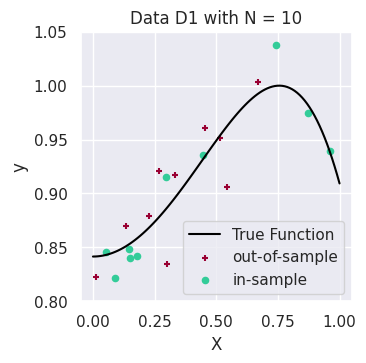

In [ ]:
plot_data(f,*D1_e1, 20, "D1")

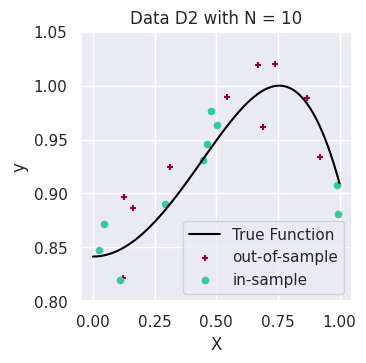

In [ ]:
plot_data(f,*D2_e1, 20, "D2")

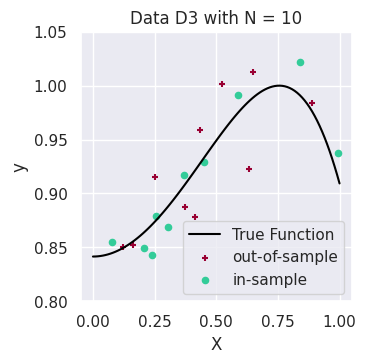

In [ ]:
plot_data(f,*D3_e1, 20, "D3")

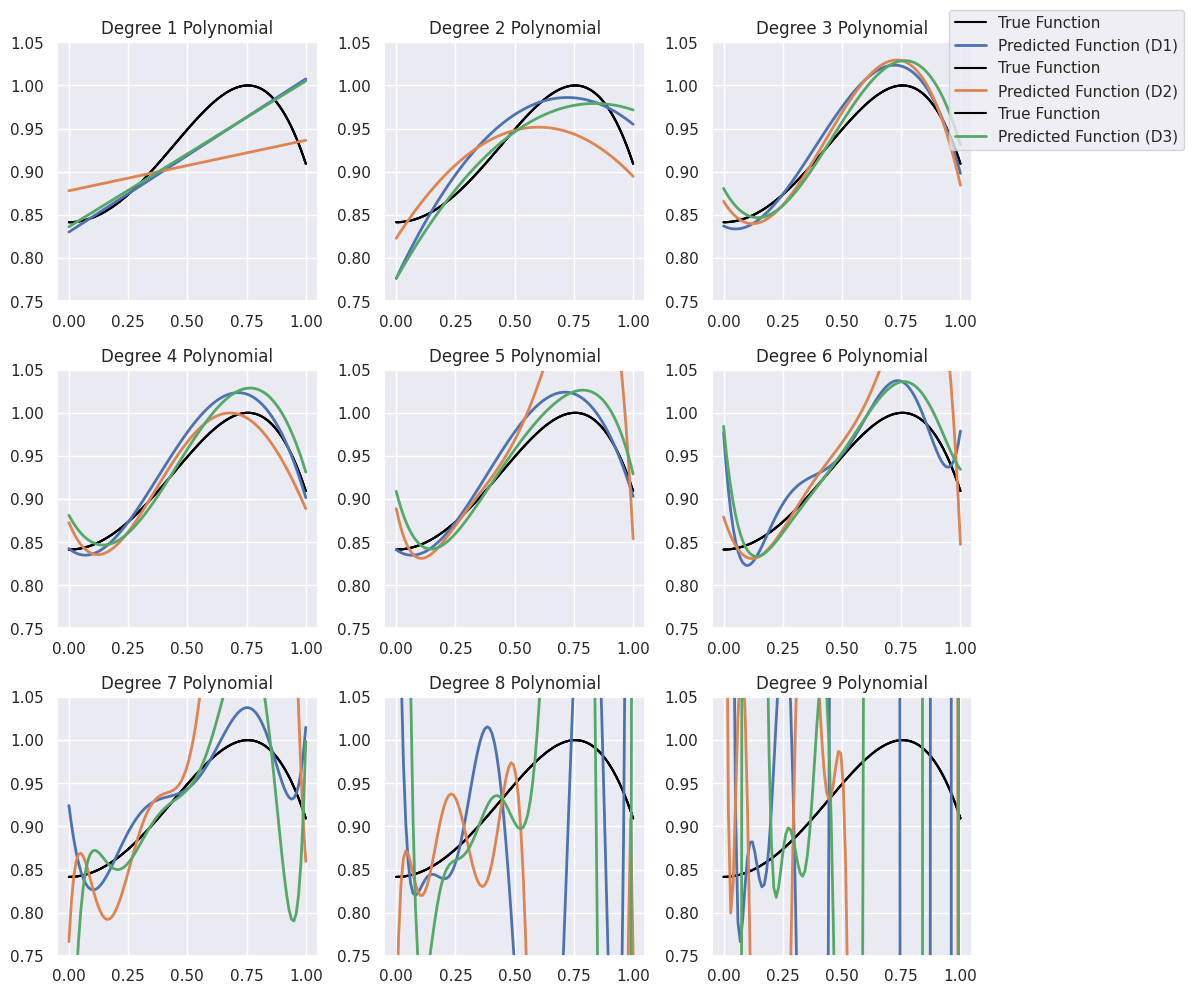

In [ ]:
plot_polynomial_regression_with_poly(D1_e1, D2_e1, D3_e1)

In [ ]:
errors_in_D1, errors_out_D1 = calculate_errors(*D1_e1)
data = {
    'Degree': range(1, 10),
    'E_in (D1_e1)': errors_in_D1,
    'E_out (D1_e1)': errors_out_D1
}
df = pd.DataFrame(data)
df[['E_in (D1_e1)', 'E_out (D1_e1)']] = df[['E_in (D1_e1)', 'E_out (D1_e1)']].applymap(lambda x: '{:.10f}'.format(x))
print(df)

   Degree  E_in (D1_e1)  E_out (D1_e1)
0       1  0.0012686503   0.0012289459
1       2  0.0006009431   0.0014156030
2       3  0.0001850244   0.0014714547
3       4  0.0001835398   0.0015522205
4       5  0.0001834817   0.0015611862
5       6  0.0000339509   0.0026529309
6       7  0.0000311681   0.0017922784
7       8  0.0000038026   0.0614110304
8       9  0.0000000000  63.9678367643


#Experiment 2

In [ ]:
datasets_e2 = []
for i in range(3):
    X_train, X_test, y_train, y_test = generate_data(100, f, sigma)
    datasets_e2.append((X_train, X_test, y_train, y_test))

In [ ]:
D1_e2=datasets_e2[0]
D2_e2=datasets_e2[1]
D3_e2=datasets_e2[2]

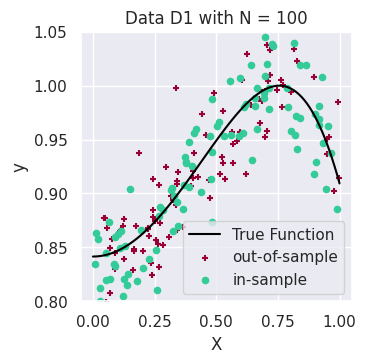

In [ ]:
plot_data(f,*D1_e2, 20, "D1")

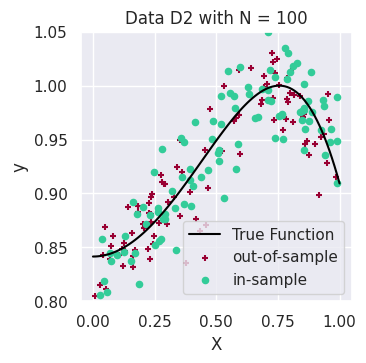

In [ ]:
plot_data(f,*D2_e2, 20, "D2")

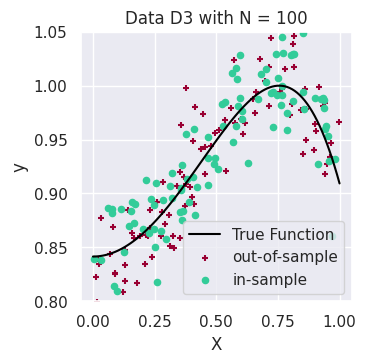

In [ ]:
plot_data(f,*D3_e2, 20, "D3")

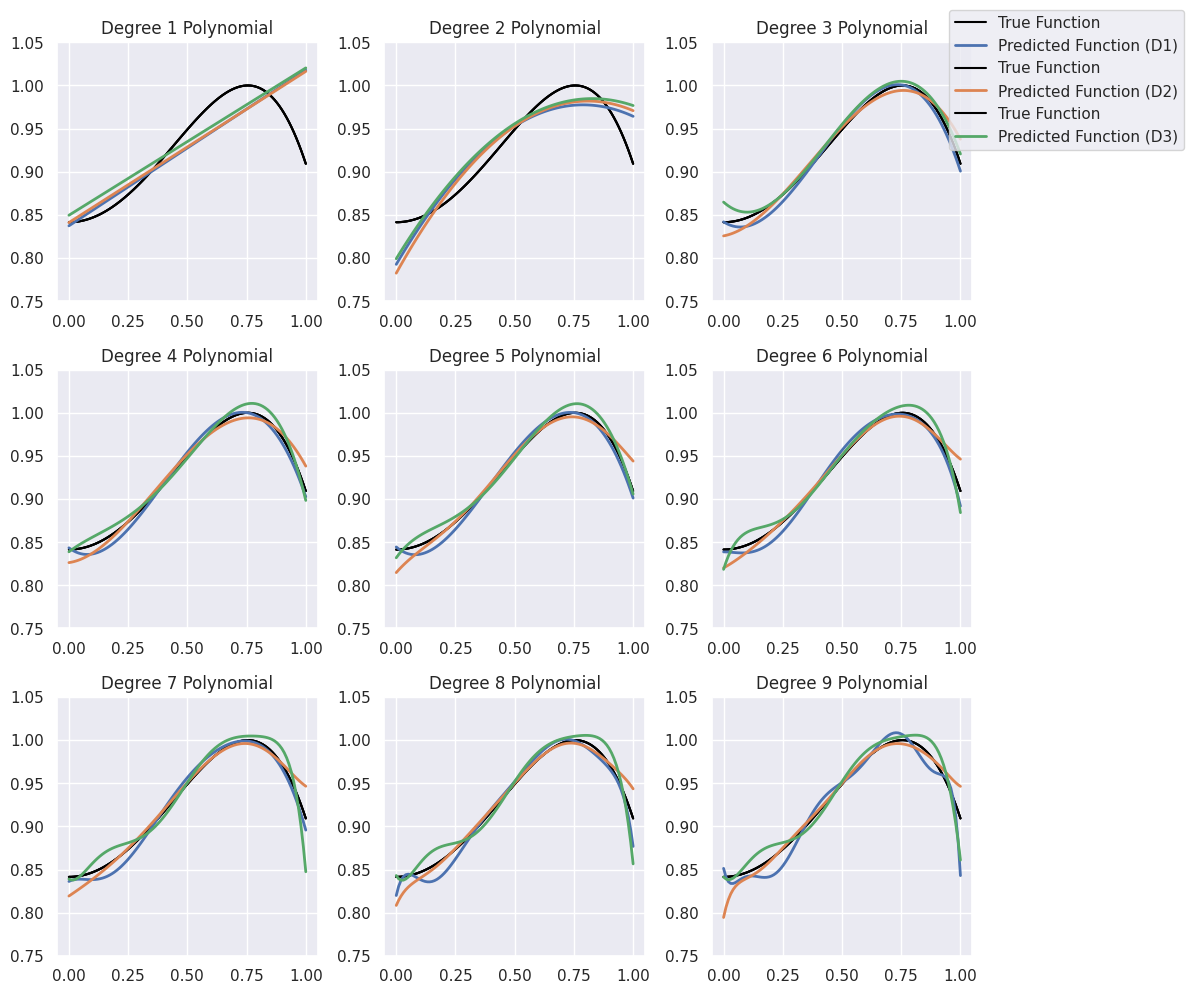

In [ ]:
plot_polynomial_regression_with_poly(D1_e2, D2_e2, D3_e2)

In [ ]:
errors_in_D1, errors_out_D1 = calculate_errors(*D1_e2)
data = {
    'Degree': range(1, 10),
    'E_in (D1_e2)': errors_in_D1,
    'E_out (D1_e2)': errors_out_D1
}
df = pd.DataFrame(data)
df[['E_in (D1_e2)', 'E_out (D1_e2)']] = df[['E_in (D1_e2)', 'E_out (D1_e2)']].applymap(lambda x: '{:.10f}'.format(x))
print(df)

   Degree  E_in (D1_e2) E_out (D1_e2)
0       1  0.0016945574  0.0014329289
1       2  0.0012047632  0.0012235605
2       3  0.0007849046  0.0009868971
3       4  0.0007846305  0.0009898084
4       5  0.0007845297  0.0009904742
5       6  0.0007816883  0.0010135679
6       7  0.0007812665  0.0010048550
7       8  0.0007700240  0.0010257318
8       9  0.0007394007  0.0010916181


#Experiment 3

In [ ]:
datasets_e3 = []
for i in range(3):
    X_train, X_test, y_train, y_test = generate_data(1000, f, sigma)
    datasets_e3.append((X_train, X_test, y_train, y_test))

In [ ]:
D1_e3=datasets_e3[0]
D2_e3=datasets_e3[1]
D3_e3=datasets_e3[2]

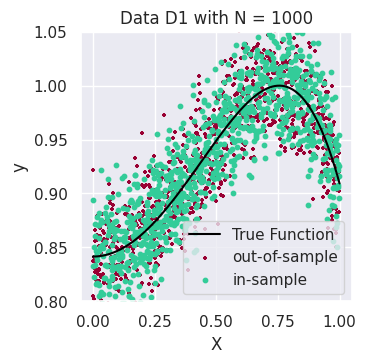

In [ ]:
plot_data(f,*D1_e3, 10, "D1")

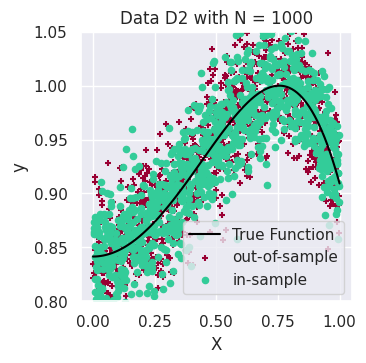

In [ ]:
plot_data(f,*D2_e3, 20, "D2")

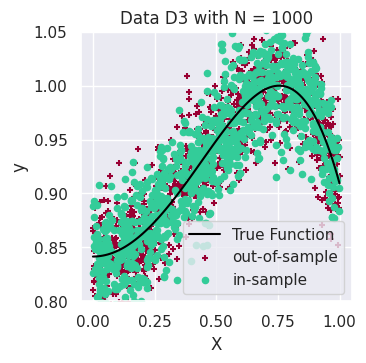

In [ ]:
plot_data(f,*D3_e3, 20, "D3")

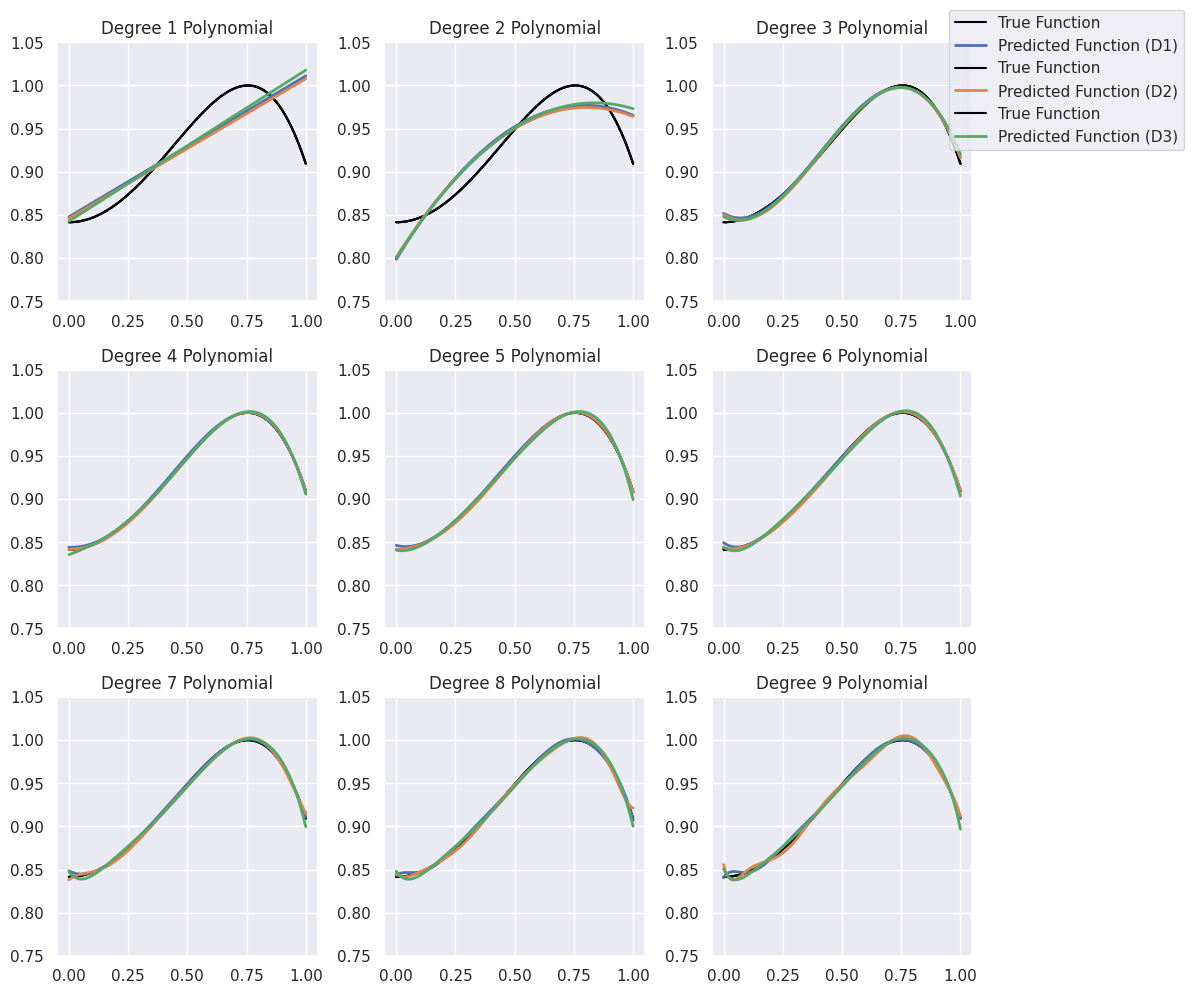

In [ ]:
plot_polynomial_regression_with_poly(D1_e3, D2_e3, D3_e3)

In [ ]:
errors_in_D1, errors_out_D1 = calculate_errors(*D1_e3)
data = {
    'Degree': range(1, 10),
    'E_in (D1_e3)': errors_in_D1,
    'E_out (D1_e3)': errors_out_D1
}
df = pd.DataFrame(data)
df[['E_in (D1_e3)', 'E_out (D1_e3)']] = df[['E_in (D1_e3)', 'E_out (D1_e3)']].applymap(lambda x: '{:.10f}'.format(x))
print(df)

   Degree  E_in (D1_e3) E_out (D1_e3)
0       1  0.0016807044  0.0018101969
1       2  0.0012593703  0.0012488469
2       3  0.0009108798  0.0008817822
3       4  0.0009054244  0.0008700618
4       5  0.0009050606  0.0008719579
5       6  0.0009044858  0.0008716044
6       7  0.0009044387  0.0008725326
7       8  0.0009032978  0.0008708486
8       9  0.0009029439  0.0008709927


###1. Tăng độ phức tạp của mô hình và Bias:
- Bias thường giảm khi tăng độ phức tạp của mô hình. Mô hình có capacity cao hơn có khả năng học được các mô hình phức tạp hơn từ dữ liệu huấn luyện, giảm sự chệch giữa giá trị dự đoán và giá trị thực tế trên tập huấn luyện.
Mô hình phức tạp hơn có khả năng thích ứng tốt hơn với dữ liệu huấn luyện, giảm bias và có thể đưa ra dự đoán chính xác hơn với mô hình thực tế.

###2. Tăng độ phức tạp của mô hình và Variance:
- Variance thường tăng khi tăng độ phức tạp của mô hình. Mô hình phức tạp hơn có khả năng học được các chi tiết cụ thể trong dữ liệu huấn luyện, tuy nhiên, nó có thể trở nên quá tập trung vào nhiễu trong dữ liệu và không tổng quát hóa tốt cho dữ liệu mới (overfitting), dẫn đến tăng variance.

###3. Tăng kích thước tập huấn luyện và Bias:
- Tăng kích thước mẫu có thể giúp giảm bias trong một số trường hợp bằng cách cung cấp đủ dữ liệu đa dạng và đủ rộng rãi để mô hình học được các quy luật phức tạp trong dữ liệu. Tuy nhiên, cần chú ý rằng không phải lúc nào cũng có sự giảm bias khi tăng kích thước mẫu, và việc giảm bias cũng phụ thuộc vào nhiều yếu tố khác nhau như loại mô hình, cấu trúc dữ liệu, và tính đại diện của dữ liệu huấn luyện.

###4. Tăng kích thước tập huấn luyện và Variance:
- Tăng kích thước tập huấn luyện có thể giảm variance. Việc có nhiều dữ liệu hơn giúp mô hình học được các quy luật tổng quát hơn từ dữ liệu, giảm nguy cơ bị overfitting và do đó giảm variance.